In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
!pip install quickdraw
import skimage.measure
from quickdraw import QuickDrawData
from IPython.display import clear_output


# Sum decomposition

In [ ]:
def decompo(S, n):
  if n == 1:
    return [[S]]
  else :
    L=[] 
    for i in range(0, S+1):
      for d in decompo(i, n-1):
        L.append([S-i] + d)
    return L

def decompo_brute(S, n):
  L = []
  for i in range((S+1)**n):
    d = [(i//((S+1)**j))%(S+1) for j in range(n)]
    if sum(d) == S:
      L.append(d)
  return L

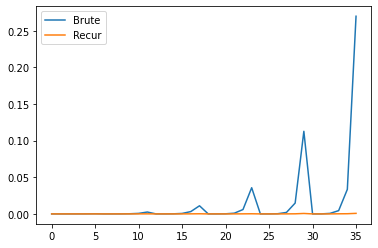

In [ ]:
Brute = []
Recur = []
for S in range(1, 7):
  for n in range(1, 7):
    t = time.time()
    a = decompo(S, n)
    Recur.append(time.time()-t)
    t = time.time()
    b = decompo_brute(S, n)
    Brute.append(time.time()-t)
plt.plot(Brute, label='Brute')
plt.plot(Recur, label='Recur')
plt.legend()
plt.show()

In [ ]:
def possibles_states(info, size):
  if len(info) == 0:
    return [[0]*size]
  spaces = size - sum(info) - len(info) + 1
  nb_cluster = len(info) + 1
  states = []
  for decomposition in decompo(spaces, nb_cluster):
    state = []
    for i in range(len(info)):
      state += [0]*decomposition[i]
      state += [1]*info[i] + [0]
    state.pop()
    state += [0]*decomposition[-1]
    states.append(state)
  return states

# Solver

In [ ]:
class NONOGRAM_SOLVER:

  def __init__(self, LINES_INFO, COLUMNS_INFO):
    self.LINE = True
    self.COLUMN = False
    self.PIC = True
    self.CROSS = False
    self.NOT_YET = -1
    self.LINES = LINES_INFO
    self.COLUMNS = COLUMNS_INFO

    self.Check_List = [(self.LINE, i) for i in range(len(self.LINES))]
    self.Check_List += [(self.COLUMN, i) for i in range(len(self.COLUMNS))]
    self.Grid = np.ones([len(self.LINES), len(self.COLUMNS)]) * self.NOT_YET
    self.Possibles = {}
    self.show()


  def get(self, to_check):
    if to_check[0] == self.LINE:
      return self.Grid[to_check[1], :]
    else:
      return self.Grid[:, to_check[1]]
  

  def push(self, checked, line):
    if checked[0] == self.LINE:
      self.Grid[checked[1], :] = line
    else:
      self.Grid[:, checked[1]] = line


  def show(self):
    for line in self.Grid:
      for i in line:
        if i == self.PIC:
          print('██', end='')
        elif i == self.CROSS:
          print('X', end=' ')
        else:
          print('_', end=' ')
      print('')
    print('')


  def add_to_check(self, to_check):
    if to_check not in self.Check_List:
      self.Check_List.insert(0, to_check)
  

  def check(self, to_check):
    change = False
    states = self.Possibles[to_check]
    line = self.get(to_check)
    for i in range(len(line)):

      if line[i] == self.PIC:
        new_states = []
        for state in states:
          if state[i] == 1:
            new_states.append(state)
          else:
            change = True
        self.Possibles[to_check] = new_states
        states = self.Possibles[to_check]


      elif line[i] == self.CROSS:
        new_states = []
        for state in states:
          if state[i] == 0:
            new_states.append(state)
          else:
            change = True
        self.Possibles[to_check] = new_states
        states = self.Possibles[to_check]

      else:
        do_pic = True
        do_cross = True
        for state in states:
          if state[i] == 0:
            do_pic = False
          else:
            do_cross = False

        if do_pic:
          line[i] = self.PIC
          self.add_to_check((not to_check[0], i))
          change = True
        if do_cross:
          line[i] = self.CROSS
          self.add_to_check((not to_check[0], i))
          change = True

    self.push(to_check, line)
    if change:
      self.add_to_check(to_check)
    return change
  

  def solve(self):
    for i in range(len(self.LINES)):
      self.Possibles[(self.LINE, i)] = possibles_states(self.LINES[i], len(self.COLUMNS))
    for i in range(len(self.COLUMNS)):
      self.Possibles[(self.COLUMN, i)] = possibles_states(self.COLUMNS[i], len(self.LINES))
    while self.NOT_YET in self.Grid:
      if self.check(self.Check_List.pop()):
        clear_output(wait=True)
        self.show()
        time.sleep(0.1)
      if len(self.Check_List) == 0:
        print('I am sorry but this is the best I can do')
        break 

In [ ]:
LINES_TEST = [[1, 1], 
              [1, 1], 
              [3], 
              [4], 
              [4], 
              [2, 6], 
              [2, 2, 2], 
              [4, 2, 2], 
              [3, 1, 2, 1], 
              [1, 2, 2, 1, 1],
              [1, 1, 2, 1], 
              [2, 4, 1], 
              [2, 1, 2], 
              [7, 4]]

COLUMNS_TEST = [[1, 2], 
                [4], 
                [10], 
                [8, 2], 
                [1, 3, 2], 
                [2, 2, 1], 
                [2, 1, 1], 
                [1, 2, 1, 1], 
                [1, 1, 1, 1, 1],  
                [1, 2, 2, 1], 
                [1, 3, 1], 
                [2, 1], 
                [2, 1, 1], 
                [4, 2], 
                [2], 
                [1]]

NONOGRAM_SOLVER(LINES_TEST, COLUMNS_TEST).solve()

██X X X ██X X X X X X X X X X X 
X ██X ██X X X X X X X X X X X X 
X ██████X X X X X X X X X X X X 
████████X X X X X X X X X X X X 
████████X X X X X X X X X X X X 
X X ████X X ████████████X X X X 
X X ████X ████X X X X ████X X X 
X X ████████X X ████X X ████X X 
X X ██████X X ██X ████X X ██X X 
X X ██X ████X ████X ██X X ██X X 
X X ██X X ██X X X ████X X ██X X 
X X ████X X ████████X X ██X X X 
X X X ████X X X X X X ██X ████X 
X X X X ██████████████X ████████



# Random image test

In [ ]:
def info(Image):
  Matrice = 1 - Image
  line_info = [[]]*Matrice.shape[0]
  for i in range(Matrice.shape[0]):
    last = 0
    for j in range(Matrice.shape[1]):
      if last == 0:
        if Matrice[i, j] == 1:
          line_info[i] = line_info[i] + [1]
          last = 1
      else:
        if Matrice[i, j] == 1:
          line_info[i][-1] += 1
        else:
          last = 0
  column_info = [[]]*Matrice.shape[1]
  for j in range(Matrice.shape[1]):
    last = 0
    for i in range(Matrice.shape[0]):
      if last == 0:
        if Matrice[i, j] == 1:
          column_info[j] = column_info[j] + [1]
          last = 1
      else:
        if Matrice[i, j] == 1:
          column_info[j][-1] += 1
        else:
          last = 0
  return line_info, column_info

downloading yoga from https://storage.googleapis.com/quickdraw_dataset/full/binary/yoga.bin
download complete
loading yoga drawings
load complete


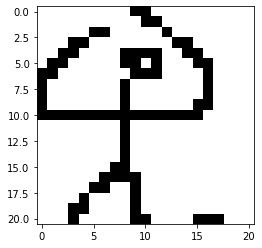

In [ ]:
im = np.array(QuickDrawData().get_drawing(np.random.choice(QuickDrawData().drawing_names)).image)
im = skimage.measure.block_reduce(im, (12, 12, 3))[:-1,:-1, 0]
im = np.where(((im-im.min())/(im.max()-im.min()))>0.9, 1, 0)
plt.imshow(im, cmap='gray')

In [ ]:
NONOGRAM_SOLVER(info(im)[0], info(im)[1]).solve()

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ _ _ X _ _ _ _ _ _ _ _ _ _ X X X 
_ _ _ _ _ X _ _ _ _ _ _ X X _ _ _ _ X X X 
_ _ ████████████████████████████_ _ X X X 
X X X X X X X X ██X X X X X X X X X X X X 
X X X X X X X X ██X X X X X X X X X X X X 
X _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
X _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
X _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
X X X X X X _ _ _ ██_ _ _ X X X X X X X X 
X _ _ _ _ _ _ _ _ ██_ _ _ _ _ _ _ _ X X X 
X _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
X _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X X X 
X _ _ _ _ _ _ _ X _ _ _ _ _ _ _ _ _ X X X 

I am sorry but this is the best I can do


# Tout pourri le dataset

In [ ]:
import tarfile
import os


!rm -rf /content/cifar-10-python.tar.gz
!wget 'http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'

!rm -rf /content/cifar-10-batches-py
tar = tarfile.open('/content/cifar-10-python.tar.gz', "r:gz")
tar.extractall()
tar.close()

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic

data = unpickle('/content/cifar-10-batches-py/data_batch_1')[b'data']

--2020-12-21 15:15:29--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  72.4MB/s    in 2.2s    

2020-12-21 15:15:31 (72.4 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



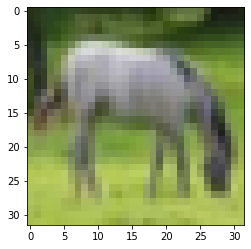

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
test_im = np.transpose(np.reshape(data[87], (3, 32, 32)), (1, 2, 0))
plt.imshow(test_im)

21.666666666666668 218.33333333333334


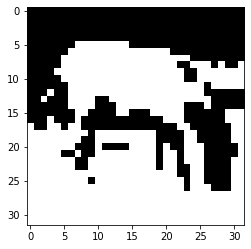

In [ ]:
grey = np.mean(test_im, axis=2)
print(np.min(grey), np.max(grey))
plt.imshow(grey, cmap='gray')
plt.imshow(np.where(grey>110, 1, 0), cmap='gray')
im = np.where(grey>110, 1, 0)

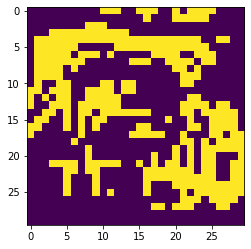

In [ ]:
from scipy.signal import convolve2d
grey = np.mean(test_im, axis=2)

Gx = np.array([[-1, 0, 1], 
                [-2, 0, 2], 
                [-1, 0, 1]])

Gy = np.array([[-1,-2,-1], 
                [ 0, 0, 0], 
                [ 1, 2, 1]])

gx = convolve2d(grey, Gx)
gy = convolve2d(grey, Gy)

norm = np.sqrt(np.power(gx, 2) + np.power(gy, 2))


plt.imshow(np.where(norm[2:-2, 2:-2]>125, 1, 0))